In [3]:
from mpl_toolkits import mplot3d
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

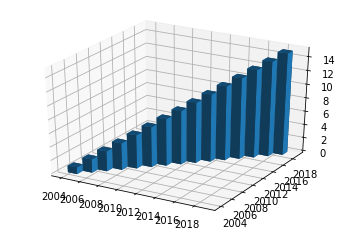

In [4]:
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

x = range(2004,2019)
y = range(2004,2019)
z = np.zeros(15)

dx = np.ones(15)
dy = np.ones(15)
dz = range(1,16)

ax1.bar3d(x,y,z,dx,dy,dz)

# Example from StackOverflow

see https://stackoverflow.com/questions/39125423/how-can-i-plot-a-pandas-multiindex-dataframe-as-3d

In [6]:
arrays = [[2010, 2010, 2010, 2011, 2011, 2011],['A', 'B', 'C', 'A', 'B', 'C']]
tuples = list(zip(*arrays))
index = pd.MultiIndex.from_tuples(tuples, names=['Year', 'Product'])         

df = pd.DataFrame({'Sales': [111, 20, 150, 10, 28, 190]}, index=index)
print (df)

              Sales
Year Product       
2010 A          111
     B           20
     C          150
2011 A           10
     B           28
     C          190


In [7]:
L = []
for i, group in df.groupby(level=1)['Sales']:
    L.append(group.values)
z = np.hstack(L).ravel()

In [8]:
xlabels = df.index.get_level_values('Year').unique()
ylabels = df.index.get_level_values('Product').unique()
x = np.arange(xlabels.shape[0])
y = np.arange(ylabels.shape[0])

In [9]:
x_M, y_M = np.meshgrid(x, y, copy=False)

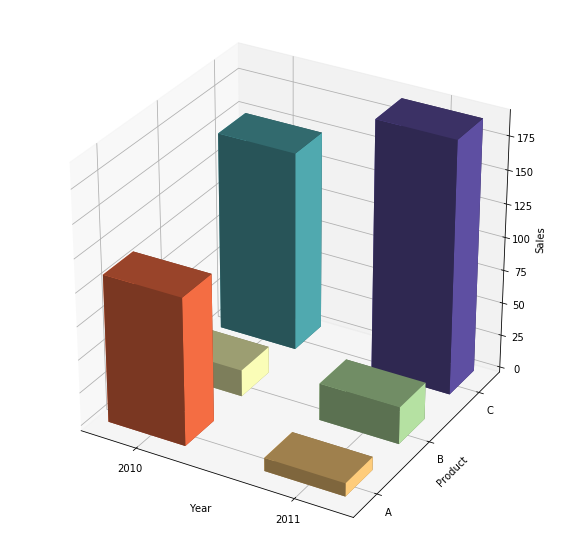

In [13]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Making the intervals in the axes match with their respective entries
ax.w_xaxis.set_ticks(x + 0.5/2.)
ax.w_yaxis.set_ticks(y + 0.5/2.)

# Renaming the ticks as they were before
ax.w_xaxis.set_ticklabels(xlabels)
ax.w_yaxis.set_ticklabels(ylabels)

# Labeling the 3 dimensions
ax.set_xlabel('Year')
ax.set_ylabel('Product')
ax.set_zlabel('Sales')

# Choosing the range of values to be extended in the set colormap
values = np.linspace(0.2, 1., x_M.ravel().shape[0])

# Selecting an appropriate colormap
colors = plt.cm.Spectral(values)
ax.bar3d(x_M.ravel(), y_M.ravel(), z*0, dx=0.5, dy=0.5, dz=z, color=colors)
plt.show()